In [26]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data

In [27]:
mnist = input_data.read_data_sets("MNIST_data/",one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [76]:
tf.reset_default_graph()

In [77]:
keep_prob = tf.placeholder(tf.float32)
learning_rate = 0.001
training_epochs = 15
batch_size = 100


In [78]:
X = tf.placeholder(tf.float32, shape=[None,784])
X_img = tf.reshape(X,[-1,28,28,1])
Y = tf.placeholder(tf.float32, shape=[None,10])

In [79]:
W1 = tf.Variable(tf.random_normal([3,3,1,32],stddev=0.01))
L1 = tf.nn.conv2d(X_img,W1,strides=[1,1,1,1],padding="SAME")
print(L1)
L1 = tf.nn.relu(L1)
print(L1)
L1 = tf.nn.max_pool(L1,ksize=[1,2,2,1],strides=[1,2,2,1],padding="SAME")
L1 = tf.nn.dropout(L1,keep_prob=keep_prob)

Tensor("Conv2D:0", shape=(?, 28, 28, 32), dtype=float32)
Tensor("Relu:0", shape=(?, 28, 28, 32), dtype=float32)


In [80]:
W2 = tf.Variable(tf.random_normal([3,3,32,64],stddev=0.01))
L2 = tf.nn.conv2d(L1,W2,strides=[1,1,1,1],padding="SAME")
L2 = tf.nn.relu(L2)
L2 = tf.nn.max_pool(L2,ksize=[1,2,2,1],strides=[1,2,2,1],padding="SAME")
L2 = tf.nn.dropout(L2,keep_prob=keep_prob)

In [81]:
W3 = tf.Variable(tf.random_normal([3,3,64,128],stddev=0.01))
L3 = tf.nn.conv2d(L2,W3,strides=[1,1,1,1],padding="SAME")
L3 = tf.nn.relu(L3)
L3 = tf.nn.max_pool(L3,ksize=[1,2,2,1],strides=[1,2,2,1],padding="SAME")
print(L3)
L3 = tf.nn.dropout(L3,keep_prob=keep_prob)

L3_flat = tf.reshape(L3,[-1,4*4*128])
print(L3_flat)

Tensor("MaxPool_2:0", shape=(?, 4, 4, 128), dtype=float32)
Tensor("Reshape_1:0", shape=(?, 2048), dtype=float32)


In [82]:
W4 = tf.get_variable("W4",shape=[4*4*128,625],initializer=tf.contrib.layers.xavier_initializer())
b1 = tf.Variable(tf.random_normal([625]))
L4 = tf.nn.relu(tf.matmul(L3_flat,W4)+b1)
L4 = tf.nn.dropout(L4,keep_prob=keep_prob)

In [83]:
print(L4)

Tensor("dropout_3/mul:0", shape=(?, 625), dtype=float32)


In [84]:
W5 = tf.get_variable("W5",shape=[625,10],initializer=tf.contrib.layers.xavier_initializer())
b5 = tf.Variable(tf.random_normal([10]))
logits = tf.matmul(L4,W5)+b5

In [85]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits,labels=Y))

In [86]:
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

In [87]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [90]:
print("학습이 시작되었습니다. 다소 시간이 걸립니다.")
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)
    
    for i in range(total_batch):
        batch_xs,batch_ys = mnist.train.next_batch(batch_size)
        c,_, = sess.run([cost,optimizer],feed_dict={X:batch_xs,Y:batch_ys,keep_prob:0.7})
        avg_cost += c / total_batch
        
    print("Epoch : ",epoch+1,"cost :",avg_cost)
print('학습이 종료되었습니다')

학습이 시작되었습니다. 다소 시간이 걸립니다.
Epoch :  1 cost : 0.49018153469670894
Epoch :  2 cost : 0.09799935560334813
Epoch :  3 cost : 0.06782049212096758
Epoch :  4 cost : 0.05774050695609982
Epoch :  5 cost : 0.046651024969972
Epoch :  6 cost : 0.046328923798758886
Epoch :  7 cost : 0.039970078559126695
Epoch :  8 cost : 0.038282194235573754
Epoch :  9 cost : 0.03409840390043841
Epoch :  10 cost : 0.03207913879294542
Epoch :  11 cost : 0.0303091811630028
Epoch :  12 cost : 0.027413490620251193
Epoch :  13 cost : 0.02821568192041011
Epoch :  14 cost : 0.027162617189725027
Epoch :  15 cost : 0.023456399384462676
학습이 종료되었습니다


In [93]:
prediction = tf.equal(tf.argmax(logits,1),tf.argmax(Y,1))
accuracy = tf.reduce_mean(tf.cast(prediction, tf.float32))
print("Accuracy",sess.run(accuracy,feed_dict={X:mnist.test.images,Y:mnist.test.labels,keep_prob:1}))

Accuracy 0.9928


Label : [4]
prediction : [4]


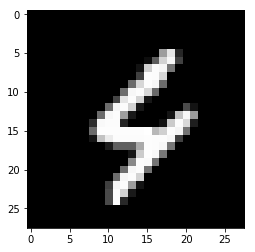

In [106]:
import random
r = random.randint(0,mnist.test.num_examples-1)
print("Label :", sess.run(tf.argmax(mnist.test.labels[r:r+1],1)))
print("prediction :",sess.run(tf.argmax(logits,1),feed_dict={X:mnist.test.images[r:r+1],keep_prob:1}))

plt.imshow(mnist.test.images[r:r+1].reshape(28,28),cmap='gray')